In [2]:
from stVAE import train_stVAE, train_stVAE_with_pseudo_data, get_proportions
from stVAE import get_cell_type_profile
from stVAE import generate_train_valid_batches
import anndata
import warnings
warnings.filterwarnings('ignore')


Global seed set to 0


In [2]:
sc_file = '/lustre/project/Stat/s152403/stVAE/test/sc_1857.h5ad'
st_file = '/lustre/project/Stat/s152403/stVAE/test/st_1857.h5ad'


In [3]:
st_adata=anndata.read_h5ad(st_file)
sc_adata=anndata.read_h5ad(sc_file)


In [4]:
get_cell_type_profile(sc_adata, st_adata)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]


Epoch 250/250: 100%|███████████████████████████████████████████████████████| 250/250 [20:18<00:00,  4.87s/it, loss=4.97e+04, v_num=1]


In [3]:
model, cell_type_list= train_stVAE()

ST_Vae(
  (encoder): Sequential(
    (0): Sequential(
      (0): Linear(in_features=1857, out_features=1024, bias=True)
      (1): BatchNorm1d(1024, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): LayerNorm((1024,), eps=1e-05, elementwise_affine=False)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Dropout(p=0.1, inplace=False)
    )
    (1): Sequential(
      (0): Linear(in_features=1024, out_features=1024, bias=True)
      (1): BatchNorm1d(1024, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): LayerNorm((1024,), eps=1e-05, elementwise_affine=False)
      (3): LeakyReLU(negative_slope=0.01)
      (4): Dropout(p=0.1, inplace=False)
    )
  )
  (fc_mu): Linear(in_features=1024, out_features=128, bias=True)
  (fc_var): Linear(in_features=1024, out_features=128, bias=True)
  (decoder): Sequential(
    (0): Sequential(
      (0): Linear(in_features=128, out_features=1024, bias=True)
      (1): BatchNorm1d(1024, eps=0.001, momentu

In [6]:
result = get_proportions(model, cell_type_list)

In [7]:
result.head()

,ENT9,ENT8,ENT6,ENT5,ENT4,ENT3,ENT2,ENTG1,ENTG4,ENTG2,...,PSPEP2,PSPEP4,PSPEP6,PSPEP7,PSNF2,PSNP1,PSNP3,PSNP2,PSNP5,PSNP6
14946486200520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
15461882276980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
15719580314420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.152106,0.0,0.0,0.0,0.0,0.0
15891379006980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
15977278353060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [12]:
import scanpy as sc
import matplotlib as mpl
def plot_spatil(slide, ct_list, ncols, spot_size, vmax):
    with mpl.rc_context({'axes.facecolor':  'white',
                         "font.size":20,
                         'figure.figsize': [8, 8]}):

        fig = sc.pl.spatial(slide, cmap="RdPu",
                      # show first 8 cell types
                      color=ct_list,
                      #itle = '',
                      ncols=ncols, size=1.5,
                      img_key=None,
                      spot_size=spot_size,
                      # limit color scale at 99.2% quantile of cell abundance
                      vmin=0, vmax=vmax,
                      return_fig = True
                     )
        fig[0].set_xlabel('')
        fig[0].set_ylabel('')
        return fig

In [8]:
st_adata_raw=anndata.read_h5ad('/project/Stat/s152403/stVAE/test/st_mouse_brain_20.h5ad')

teglu_ct_lst = []
for ct in cell_type_list:
    if 'TEGLU' in ct:
        teglu_ct_lst.append(ct)

In [9]:
st_adata_raw.obs[result.columns] = result
tmp_slide = anndata.AnnData(st_adata_raw.X, obs=st_adata_raw.obs, var=st_adata_raw.var, uns=st_adata_raw.uns,obsm=st_adata_raw.obsm)

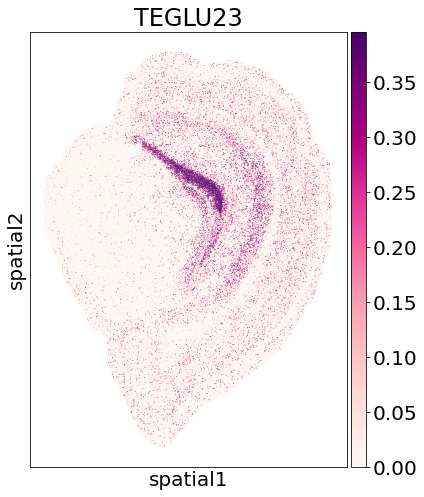

256444

In [14]:
spot_size = 20
ncols = 1
plot_spatil(tmp_slide, 'TEGLU23', ncols, spot_size, 'p99.2')
import gc
gc.collect()